## ***Import libraries***

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

In [2]:
custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "gray"}
sns.set_style("darkgrid", rc = custom)

## ***Load data MNIST***

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

In [6]:
def plot_img(img, label):
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

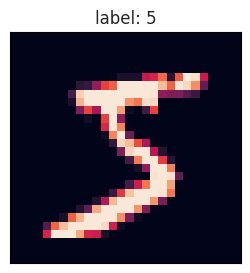

In [7]:
plot_img(X_train[0], f'label: {y_train[0]}')

## ***Create class Dataset***

In [8]:
class MNIST(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return torch.tensor(self.data[index]), torch.tensor(self.labels[index])

In [9]:
train_data = MNIST(X_train, y_train)
test_data = MNIST(X_test, y_test)

In [10]:
train_loader = DataLoader(train_data, 32, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, 32)

## ***Create our Network***

In [12]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim):
        super(Net, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Linear(hidden_dims[1], output_dim)
        )
    def forward(self, x):
        return self.layers(x.type(torch.float32))

In [13]:
input_dim = 784
hidden_dims = [512, 256]
output_dim = np.unique(y_train).shape[0]
lr = 0.001
epochs = 5

In [14]:
model = Net(input_dim, hidden_dims, output_dim)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(params=model.parameters(), lr=lr)

## ***Create training process***

In [16]:
model.train()

for epoch in range(epochs):
    epoch_loss = []
    for batch in train_loader:
        X_batch, y_batch = batch
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
    print(np.mean(epoch_loss))


0.21191879466945926
0.0831658780585664
0.05835481603598843
0.04314167758473098
0.03609516215942179


## ***Create testing process***

In [18]:
model.eval()
accuracies = []

for batch in test_loader:
    with torch.no_grad():
        out = model(batch[0])
    predictions = out.argmax(axis=-1)
    accuracies.append(accuracy_score(predictions, batch[1]))

print(f'Accuracy = {np.mean(accuracies)}')

Accuracy = 0.9785343450479234
